In [17]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
# Step 2: Load Dataset
df = pd.read_csv("Air_Quality_Data.csv")
print("First 5 Records:")
print(df.head())

First 5 Records:
   Station_ID  PM2.5  PM10  NO2   CO  O3 AQI_Level
0           1     12    25   15  0.3  55      Good
1           2     18    40   20  0.4  48      Good
2           3     22    50   25  0.5  45      Good
3           4     28    60   30  0.6  42      Good
4           5     35    75   40  0.8  38  Moderate


In [19]:
# Step 3: Data Preprocessing
df = df.dropna()

# Encode target variable
label_encoder = LabelEncoder()
df["AQI_Level"] = label_encoder.fit_transform(df["AQI_Level"])
print("\nEncoded AQI Levels:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Define features & target
X = df[["PM2.5", "PM10", "NO2", "CO", "O3"]]
y = df["AQI_Level"]

# Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


Encoded AQI Levels: {'Good': np.int64(0), 'Moderate': np.int64(1), 'Poor': np.int64(2), 'Severe': np.int64(3), 'Very Poor': np.int64(4)}


In [20]:
# Step 5: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predictions & Evaluation
y_pred = rf_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Air Quality Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         2
           4       0.67      0.50      0.57         4

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.83        15
weighted avg       0.81      0.80      0.80        15

Accuracy: 0.8


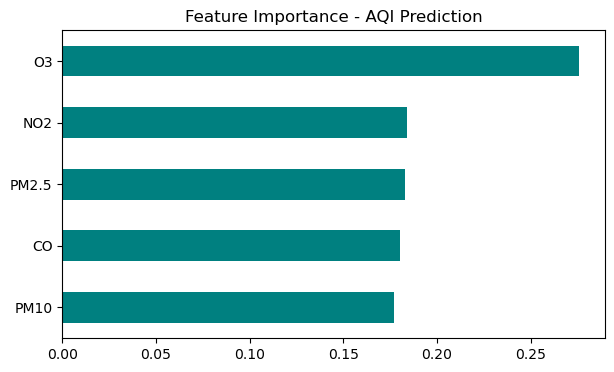

In [21]:
# Step 7: Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal', figsize=(7,4))
plt.title("Feature Importance - AQI Prediction")
plt.show()

In [22]:
# Step 8: Predict AQI for New Sensor Reading
new_sensor_data = pd.DataFrame({
    "PM2.5": [65],
    "PM10": [110],
    "NO2": [55],
    "CO": [1.1],
    "O3": [20]
})

new_scaled = scaler.transform(new_sensor_data)
aqi_pred = rf_model.predict(new_scaled)[0]
aqi_label = label_encoder.inverse_transform([aqi_pred])[0]

print(f"\nPredicted AQI Level: {aqi_label}")


Predicted AQI Level: Moderate
